<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/Solution_Homework_Python_Pandas_CoeffVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/1sep/2008.csv

--2023-10-22 09:37:03--  https://storage.googleapis.com/1sep/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.215.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M   159MB/s    in 4.3s    

2023-10-22 09:37:07 (154 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1627.0,1600,1916.0,1900,WN,2907,...,8.0,21.0,0,NaN,0,2.0,0.0,0.0,0.0,14.0
1,2008,1,3,4,615.0,610,746.0,730,WN,276,...,4.0,13.0,0,NaN,0,0.0,0.0,16.0,0.0,0.0
2,2008,1,3,4,1423.0,1335,1519.0,1440,WN,3144,...,5.0,9.0,0,NaN,0,11.0,0.0,0.0,0.0,28.0
3,2008,1,3,4,730.0,735,822.0,835,WN,1194,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1510.0,1505,1734.0,1740,WN,3247,...,5.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68686 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68529 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69252 non-null  object 
 11  ActualElapsedTime  68502 non-null  float64
 12  CRSElapsedTime     70087 non-null  float64
 13  AirTime            68502 non-null  float64
 14  ArrDelay           68502 non-null  float64
 15  DepDelay           68686 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,70096.0,6.363972,3.402221,1.0,3.0,6.0,9.0,12.0
DayofMonth,70096.0,15.710483,8.830219,1.0,8.0,16.0,23.0,31.0
DayOfWeek,70096.0,3.918769,1.984013,1.0,2.0,4.0,6.0,7.0
DepTime,68686.0,1331.956833,478.454375,1.0,926.0,1325.0,1727.0,2400.0
CRSDepTime,70096.0,1324.220968,465.149774,1.0,925.0,1317.0,1715.0,2359.0
ArrTime,68529.0,1479.932350,505.912192,1.0,1104.0,1512.0,1908.0,2400.0
CRSArrTime,70096.0,1494.302870,483.473359,1.0,1113.0,1516.0,1907.0,2400.0
FlightNum,70096.0,2231.614800,1962.479376,1.0,627.0,1573.0,3528.5,9740.0
ActualElapsedTime,68502.0,126.898645,70.037742,16.0,76.0,109.0,156.0,631.0


In [10]:
## เตรียมข้อมูลสำหรับการวิเคราะห์หา C.V.

describe_pd = pd.DataFrame(raw_pd.describe().transpose())

describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [11]:
## ดู Dispersion จาก C.V.

#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.363972,3.402221,53.460644
DayofMonth,15.710483,8.830219,56.205902
DayOfWeek,3.918769,1.984013,50.628480
DepTime,1331.956833,478.454375,35.921162
CRSDepTime,1324.220968,465.149774,35.126296
ArrTime,1479.932350,505.912192,34.184819
CRSArrTime,1494.302870,483.473359,32.354442
FlightNum,2231.614800,1962.479376,87.939880
ActualElapsedTime,126.898645,70.037742,55.191875


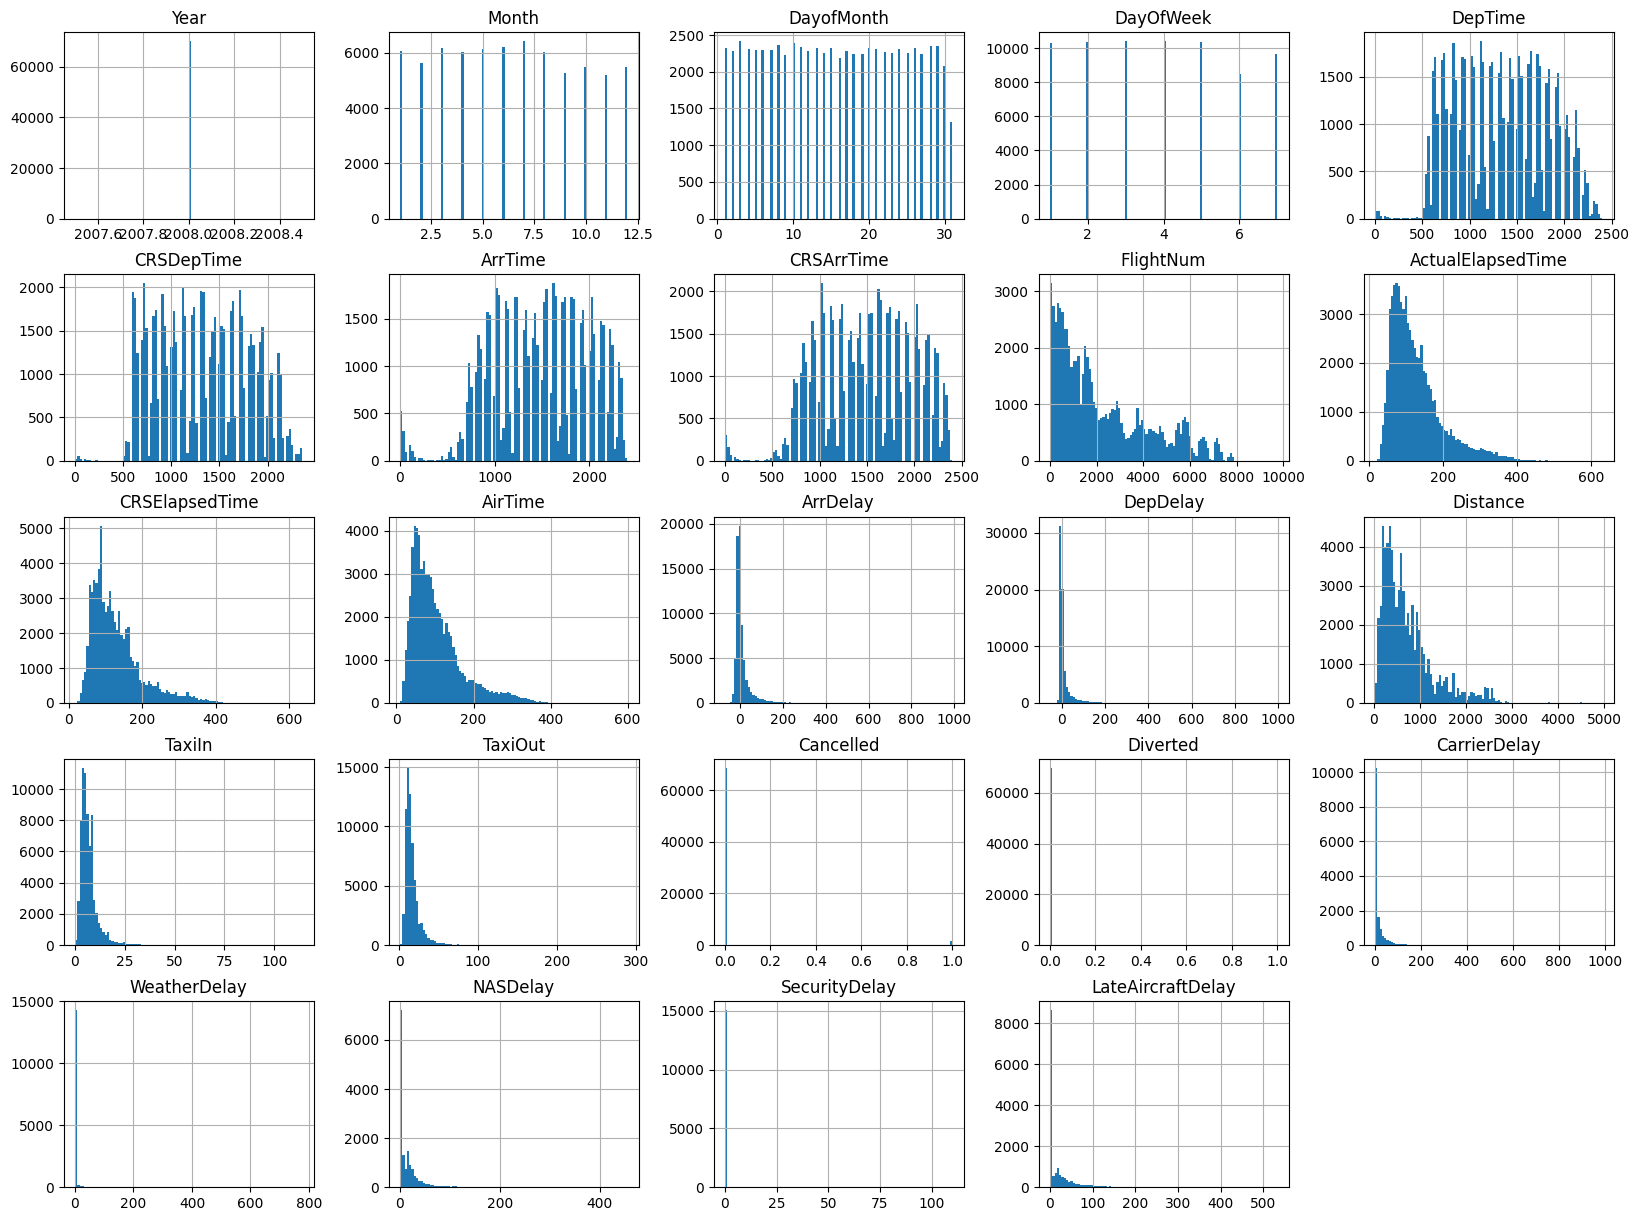

In [12]:
## ดู Distribution ของแต่ละ column

raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [13]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


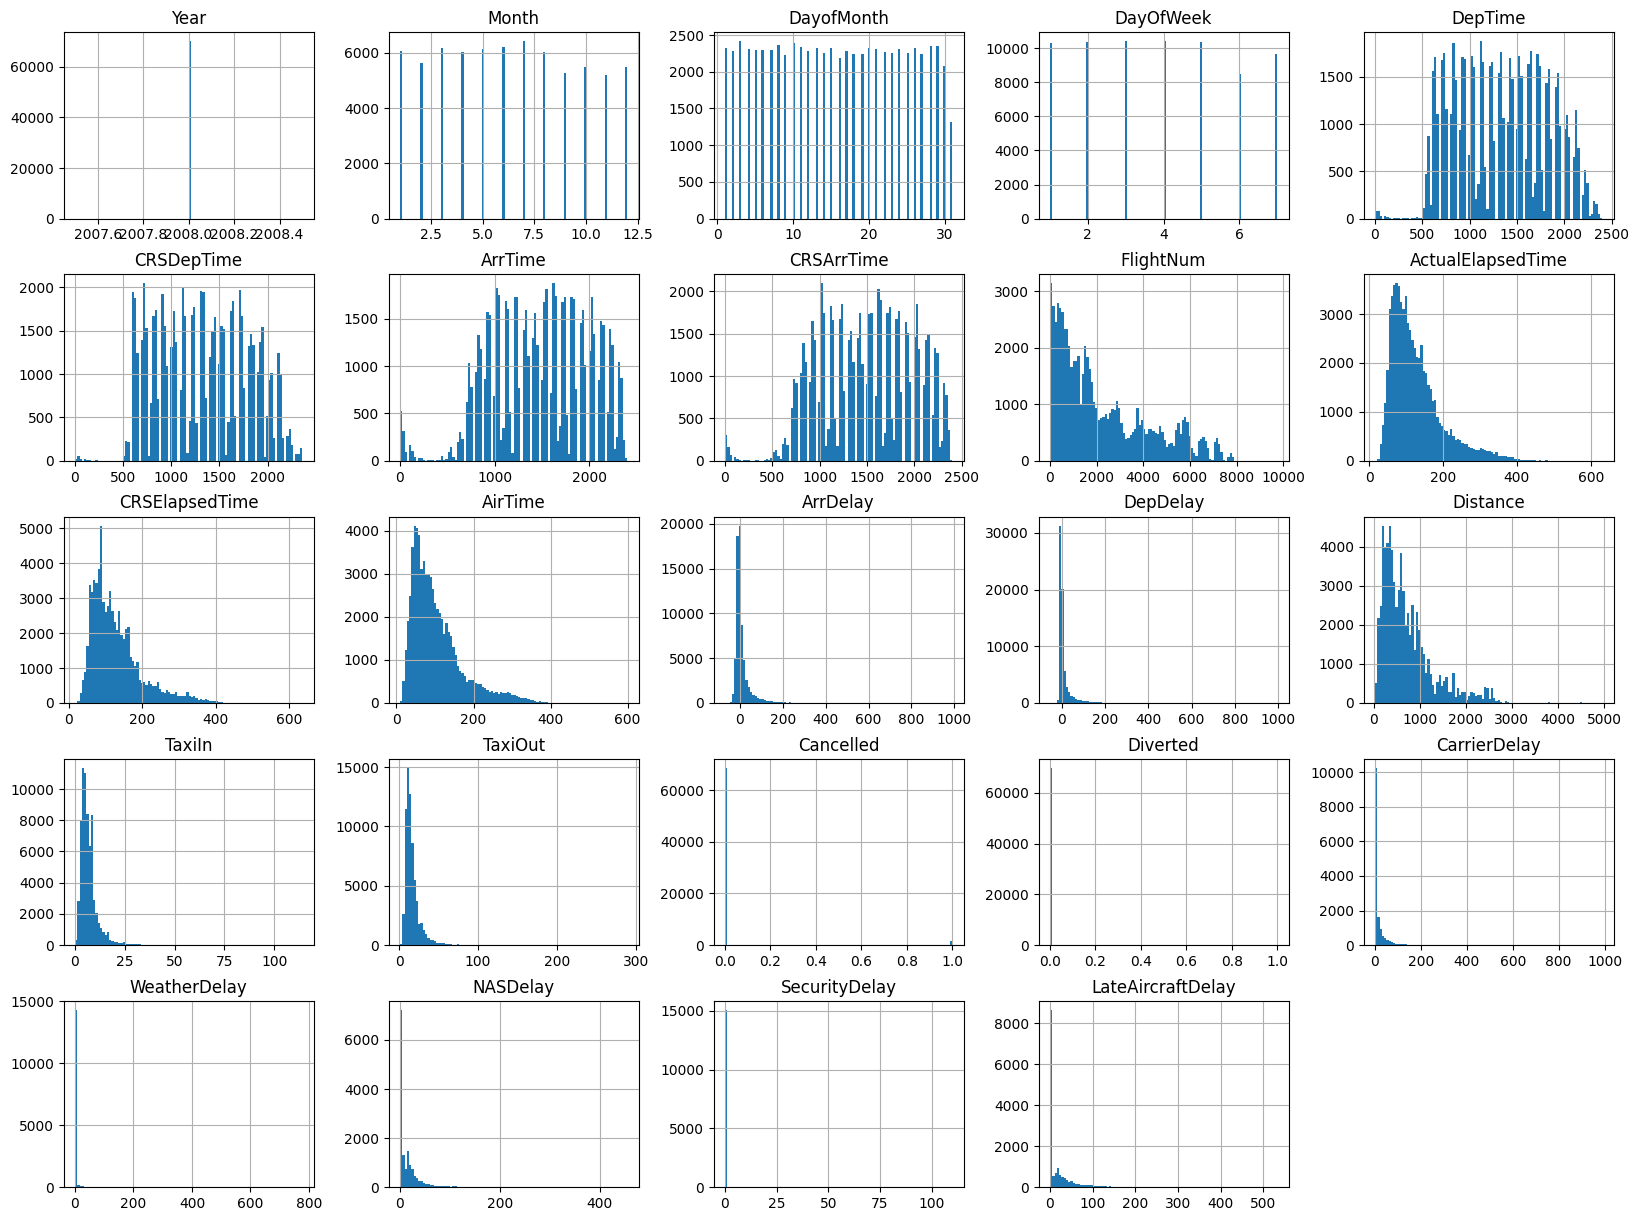

In [14]:
raw_pd[numerical].hist(bins=100, figsize=(20,15))
plt.show()

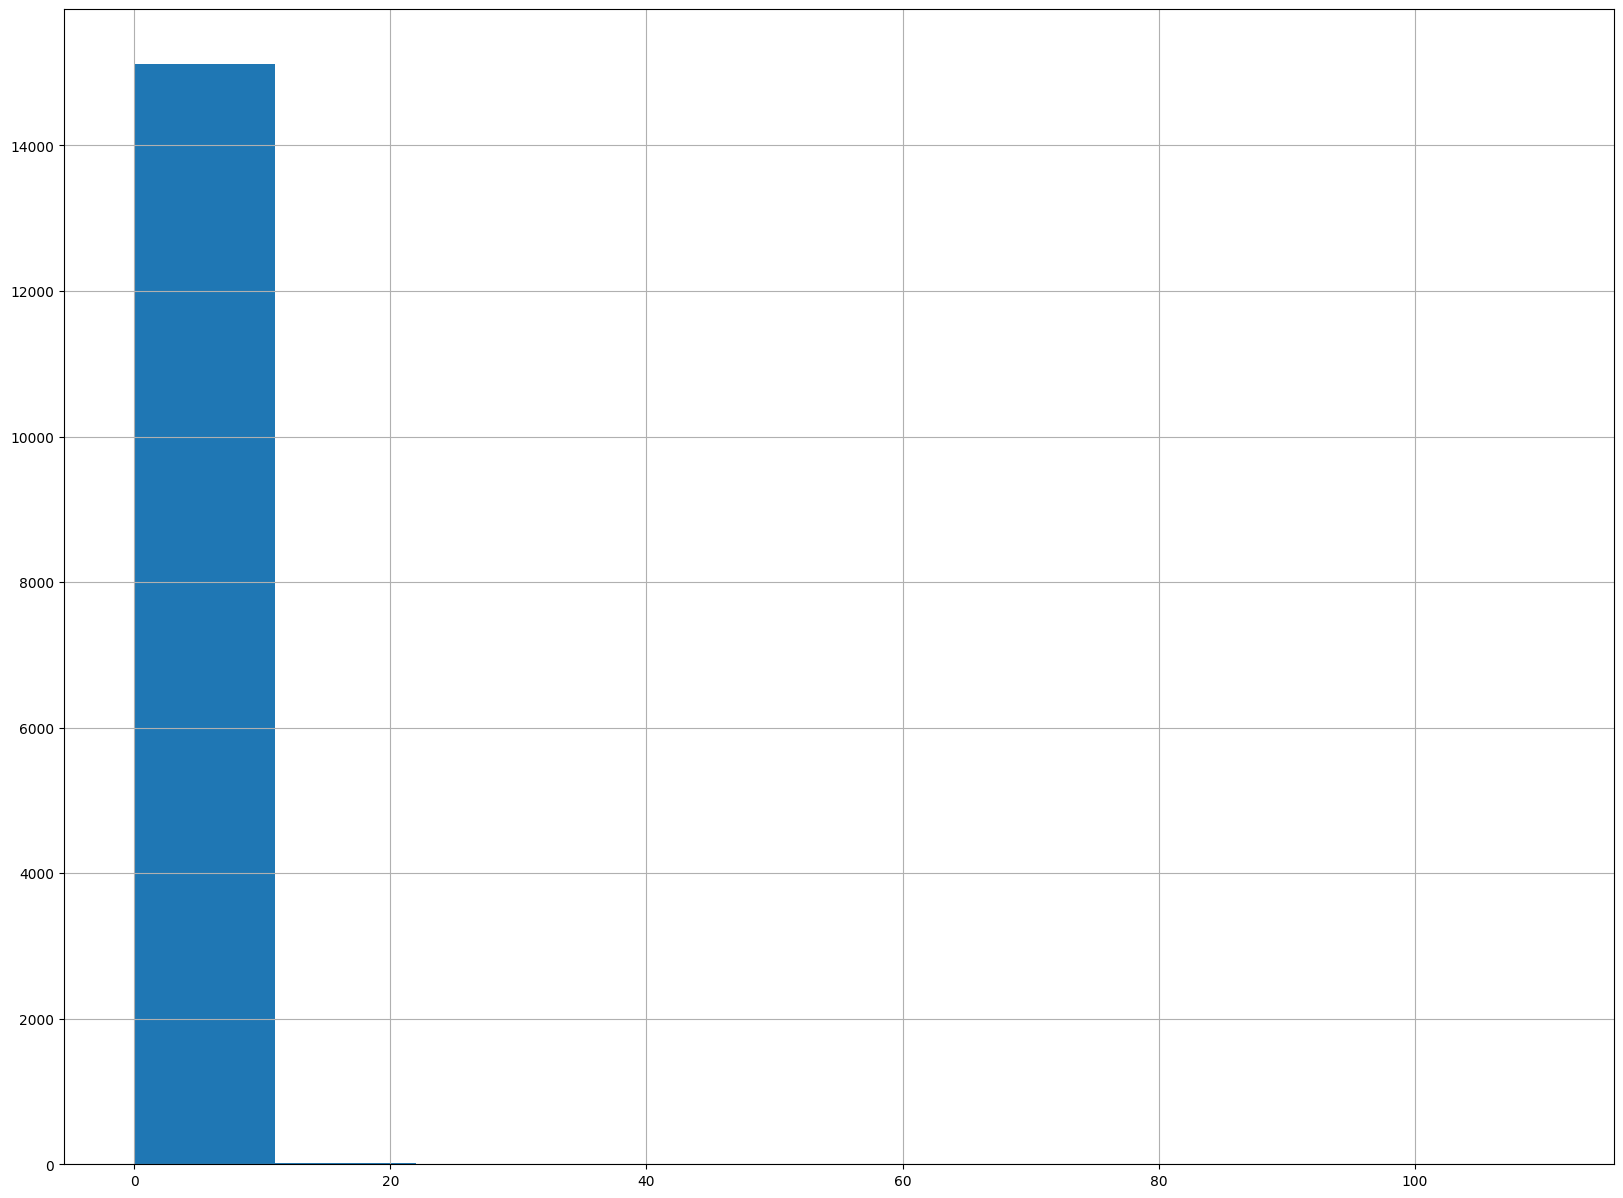

In [15]:
raw_pd['SecurityDelay'].hist(bins=10, figsize=(20,15))
plt.show()

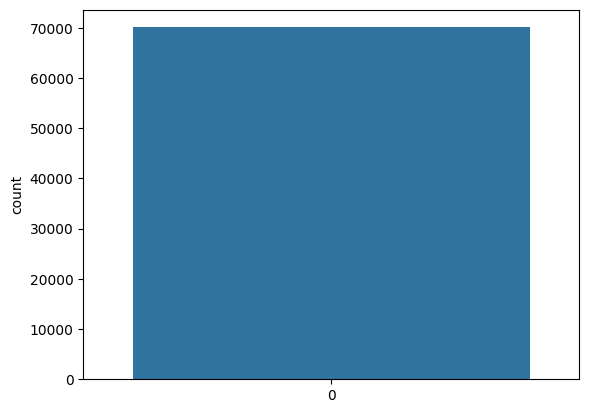

In [16]:
sns.countplot(raw_pd['DepTime']);

In [17]:
#sns.countplot(raw_pd['UniqueCarrier']);

In [18]:
#sns.displot(raw_pd,x='TailNum', hue='DepTime');

In [19]:
raw_pd['AirTime'].describe()

count    68502.000000
mean       103.668170
std         67.357763
min          9.000000
25%         55.000000
50%         86.000000
75%        131.000000
max        599.000000
Name: AirTime, dtype: float64

<Axes: xlabel='AirTime'>

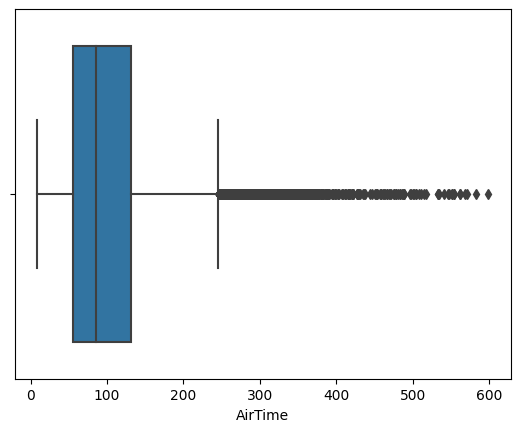

In [20]:
sns.boxplot(x=raw_pd['AirTime'])

In [21]:
raw_pd['ActualElapsedTime'].describe()

count    68502.000000
mean       126.898645
std         70.037742
min         16.000000
25%         76.000000
50%        109.000000
75%        156.000000
max        631.000000
Name: ActualElapsedTime, dtype: float64

<Axes: xlabel='ActualElapsedTime'>

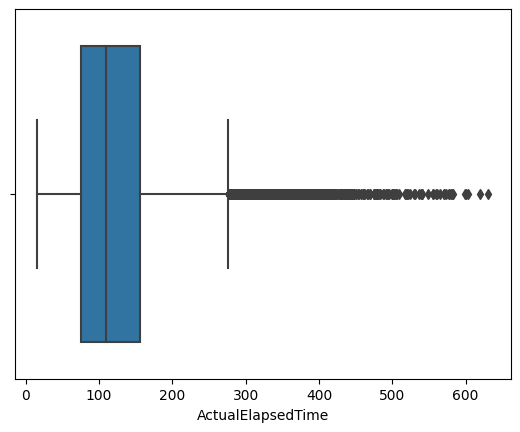

In [22]:
sns.boxplot(x=raw_pd['ActualElapsedTime'])

In [23]:
raw_pd['Cancelled'].describe()

count    70096.000000
mean         0.020301
std          0.141028
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cancelled, dtype: float64

In [24]:
raw_pd.groupby(by='Cancelled')['Cancelled'].count()

Cancelled
0    68673
1     1423
Name: Cancelled, dtype: int64

In [25]:
raw_pd['Diverted'].describe()

## สังเกตค่า max, min แล้วคือ [0,1] ซึ่งเป็น Discrete ไม่ใช่ continuous
## จึงไม่เหมาะกับการวิเคราะห์ด้วย boxplot

count    70096.000000
mean         0.002440
std          0.049331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diverted, dtype: float64

In [26]:
## sns.boxplot(x=raw_pd['Diverted'])

In [27]:
raw_pd.groupby(by='Diverted')['Diverted'].count()

Diverted
0    69925
1      171
Name: Diverted, dtype: int64

In [28]:
analysisCol_list = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [29]:
raw_pd[analysisCol_list[0]].describe()

count    15152.000000
mean        15.987064
std         40.184169
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max        990.000000
Name: CarrierDelay, dtype: float64

<Axes: xlabel='CarrierDelay'>

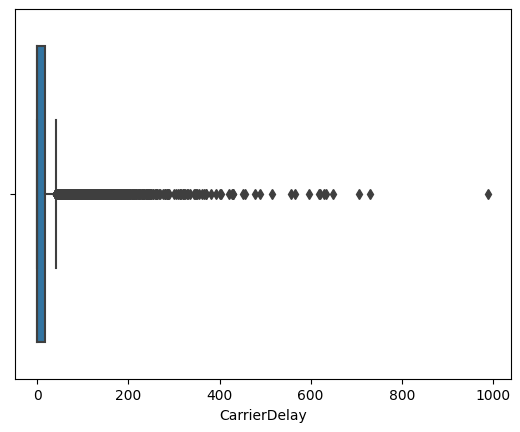

In [30]:
sns.boxplot(x=raw_pd[analysisCol_list[0]])

In [31]:
raw_pd[analysisCol_list[1]].describe()

count    15152.000000
mean         3.008778
std         19.336810
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        777.000000
Name: WeatherDelay, dtype: float64

<Axes: xlabel='WeatherDelay'>

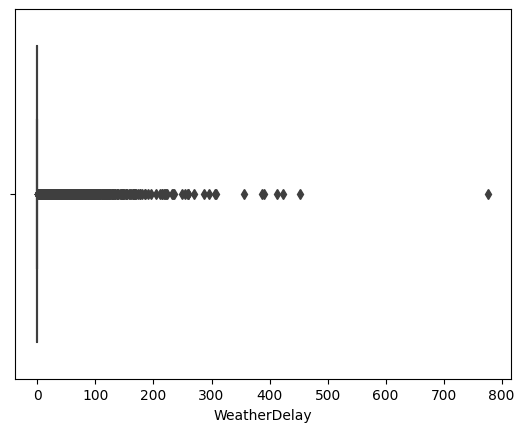

In [32]:
sns.boxplot(x=raw_pd[analysisCol_list[1]])

In [33]:
raw_pd[analysisCol_list[2]].describe()

count    15152.000000
mean        16.806758
std         30.319497
min          0.000000
25%          0.000000
50%          6.000000
75%         21.000000
max        455.000000
Name: NASDelay, dtype: float64

<Axes: xlabel='NASDelay'>

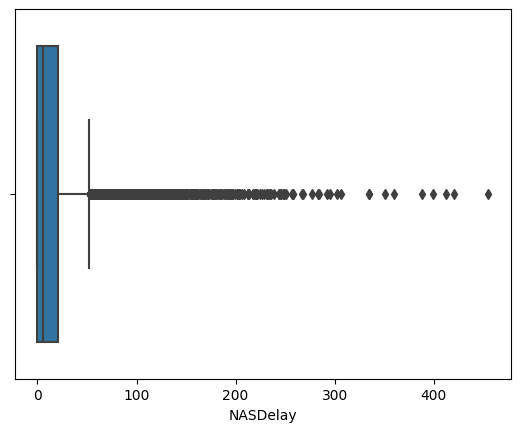

In [34]:
sns.boxplot(x=raw_pd[analysisCol_list[2]])

In [35]:
raw_pd[analysisCol_list[3]].describe()

count    15152.000000
mean         0.075172
std          1.603272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        110.000000
Name: SecurityDelay, dtype: float64

<Axes: xlabel='SecurityDelay'>

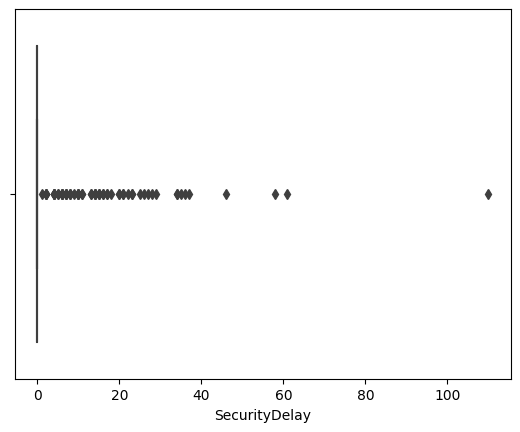

In [36]:
sns.boxplot(x=raw_pd[analysisCol_list[3]])

In [37]:
raw_pd[analysisCol_list[4]].describe()

count    15152.000000
mean        20.210335
std         37.623580
min          0.000000
25%          0.000000
50%          0.000000
75%         26.000000
max        533.000000
Name: LateAircraftDelay, dtype: float64

<Axes: xlabel='LateAircraftDelay'>

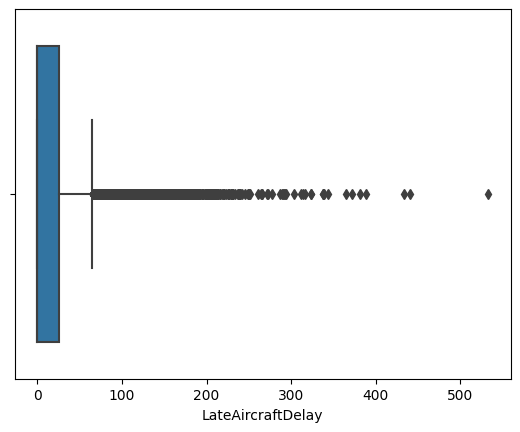

In [38]:
sns.boxplot(x=raw_pd[analysisCol_list[4]])

In [39]:
raw_pd['ArrDelay'].describe()

count    68502.000000
mean         7.908601
std         37.642768
min        -70.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max        990.000000
Name: ArrDelay, dtype: float64

<Axes: xlabel='ArrDelay'>

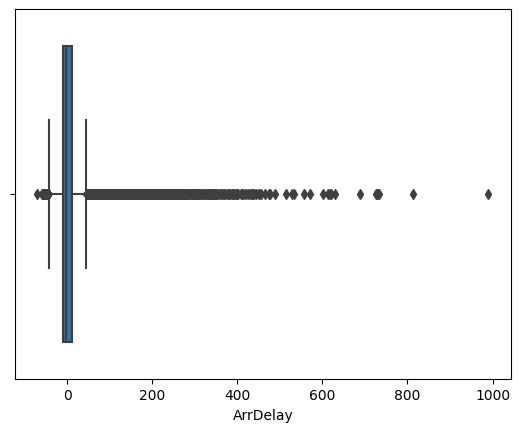

In [40]:
sns.boxplot(x=raw_pd['ArrDelay'])

In [41]:
raw_pd['DepDelay'].describe()

count    68686.000000
mean         9.734531
std         34.474646
min        -54.000000
25%         -4.000000
50%         -1.000000
75%          8.000000
max        996.000000
Name: DepDelay, dtype: float64

<Axes: xlabel='DepDelay'>

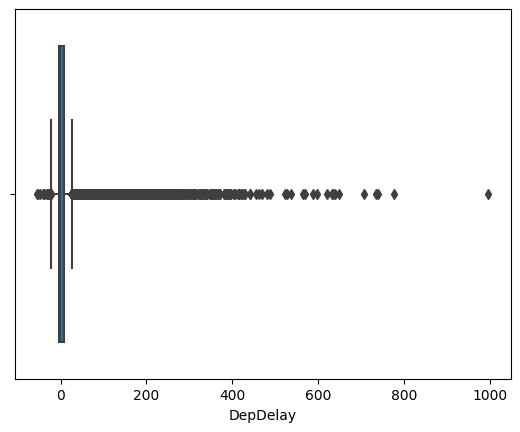

In [42]:
sns.boxplot(x=raw_pd['DepDelay'])

In [43]:
raw_pd['TaxiIn'].describe()

count    68529.000000
mean         6.816516
std          4.759082
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        114.000000
Name: TaxiIn, dtype: float64

<Axes: xlabel='TaxiIn'>

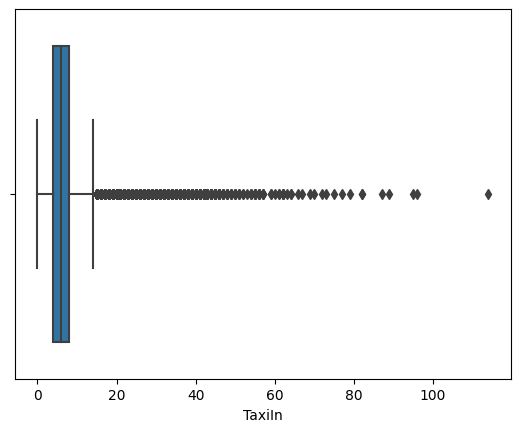

In [44]:
sns.boxplot(x=raw_pd['TaxiIn'])

In [45]:
raw_pd['TaxiOut'].describe()

count    68679.000000
mean        16.423361
std         11.224764
min          1.000000
25%         10.000000
50%         14.000000
75%         19.000000
max        289.000000
Name: TaxiOut, dtype: float64

<Axes: xlabel='TaxiOut'>

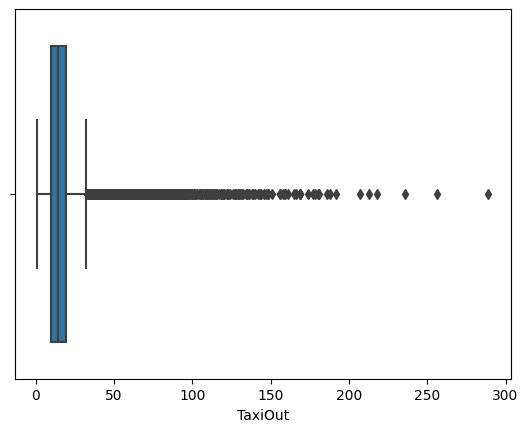

In [46]:
sns.boxplot(x=raw_pd['TaxiOut'])

In [47]:
raw_pd['Distance'].describe()

count    70096.000000
mean       723.307892
std        560.421824
min         31.000000
25%        325.000000
50%        580.000000
75%        946.000000
max       4962.000000
Name: Distance, dtype: float64

<Axes: xlabel='Distance'>

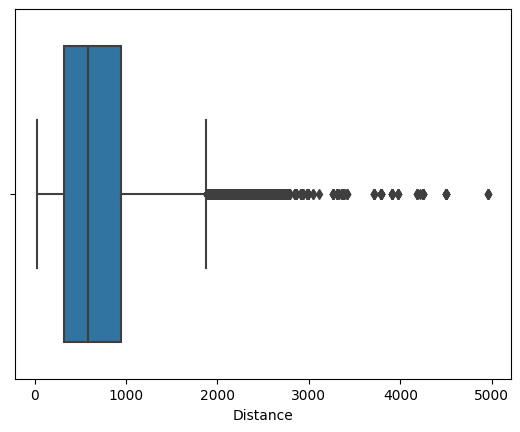

In [48]:
sns.boxplot(x=raw_pd['Distance'])

In [49]:
raw_pd['AirTime'].describe()

count    68502.000000
mean       103.668170
std         67.357763
min          9.000000
25%         55.000000
50%         86.000000
75%        131.000000
max        599.000000
Name: AirTime, dtype: float64

<Axes: xlabel='AirTime'>

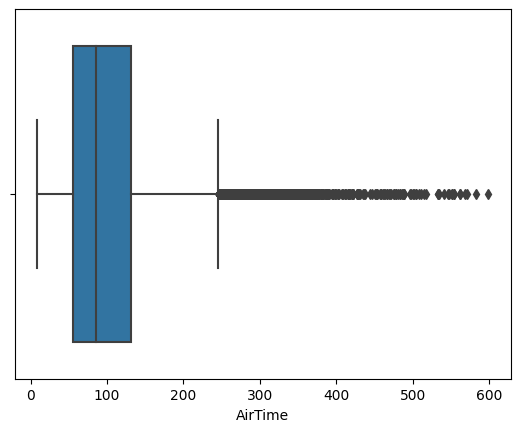

In [50]:
sns.boxplot(x=raw_pd['AirTime'])

In [51]:
## Multivariate Analysis - Correlation

<Axes: xlabel='ArrDelay', ylabel='LateAircraftDelay'>

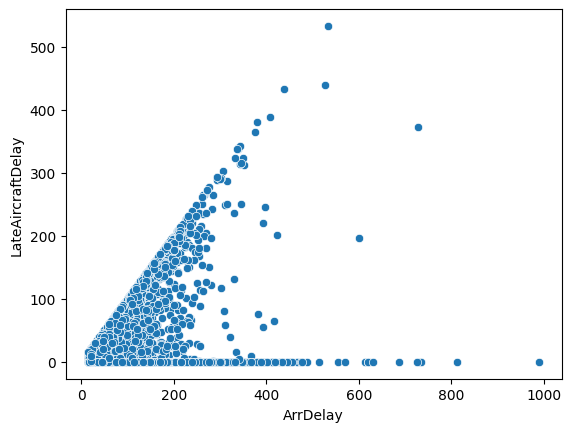

In [52]:
sns.scatterplot(data=raw_pd, x='ArrDelay',y='LateAircraftDelay')

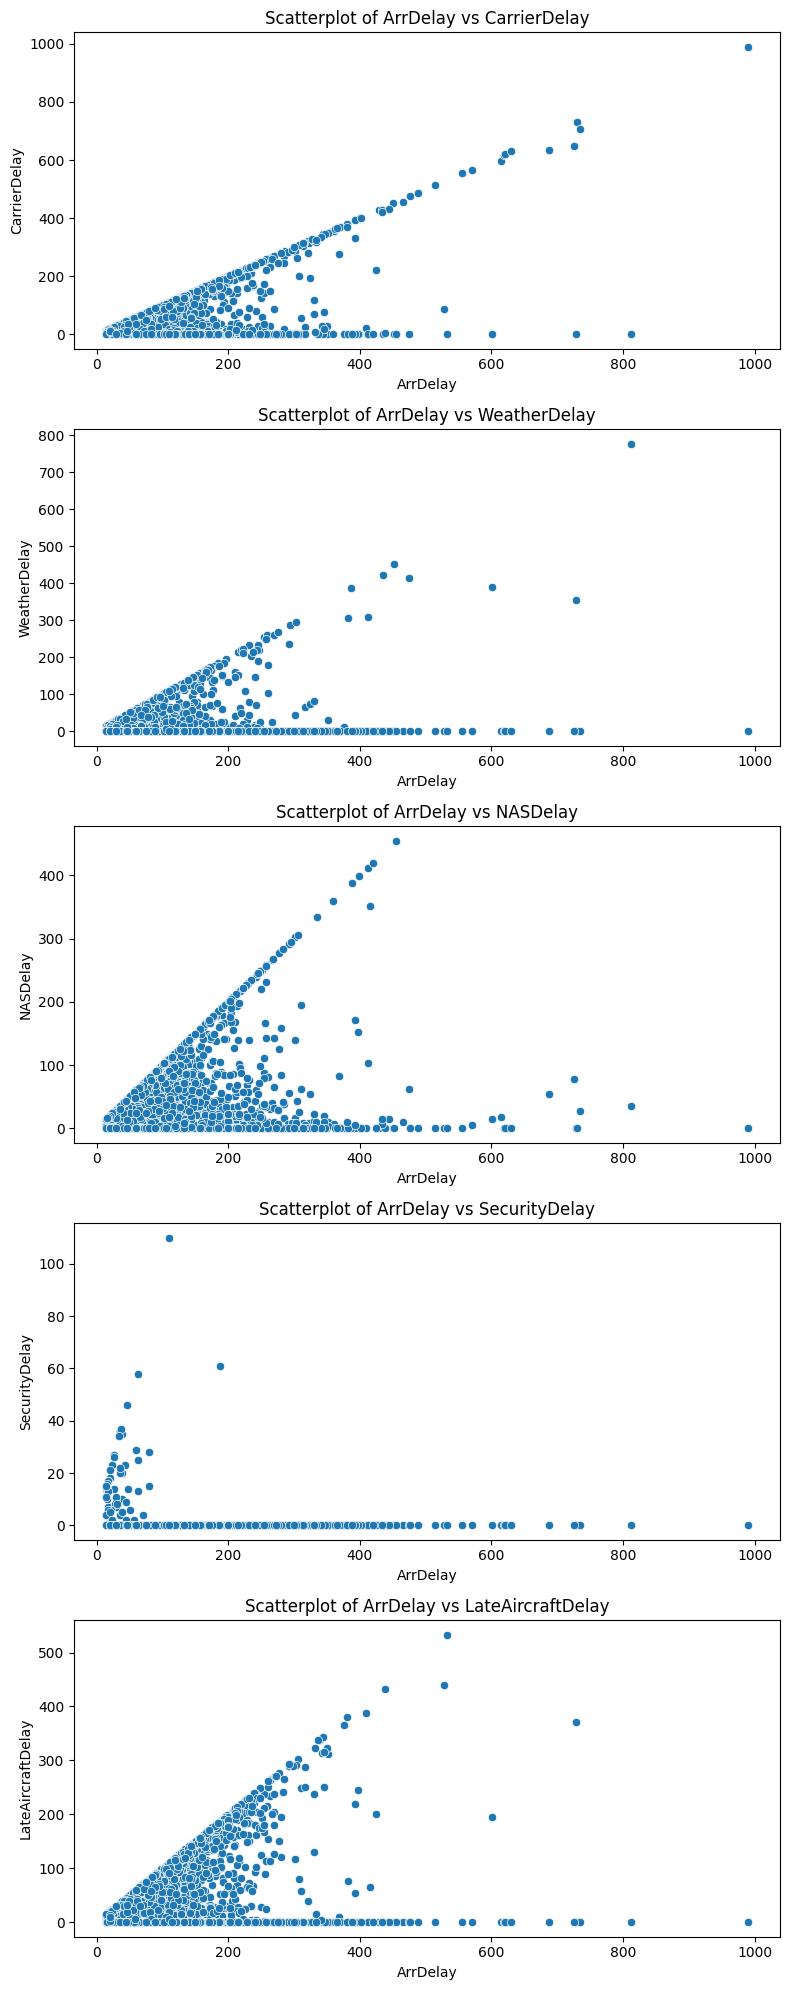

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# ตั้งค่าขนาดของแต่ละ figure
fig, axes = plt.subplots(nrows=len(analysisCol_list), figsize=(8, 4*len(analysisCol_list)))

for idx, col in enumerate(analysisCol_list):
    sns.scatterplot(data=raw_pd, x='ArrDelay', y=col, ax=axes[idx])
    axes[idx].set_title(f'Scatterplot of ArrDelay vs {col}')

plt.tight_layout()
plt.show()


In [54]:
## Feature Engineering, Model Training and Evaluation

In [55]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [56]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [57]:
max_distance = raw_pd['Distance'].max()
min_distance = raw_pd['Distance'].min()

In [58]:
max_ArrDelay = raw_pd['ArrDelay'].max()
min_ArrDelay = raw_pd['ArrDelay'].min()

In [59]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

In [60]:
def t_normalized_ArrDelay(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_ArrDelay)/(max_ArrDelay-min_ArrDelay))

In [61]:
raw_pd['Distance'] = raw_pd['Distance'].apply(lambda x:t_normalized_distance(x))

In [62]:
raw_pd['ArrDelay'] = raw_pd['ArrDelay'].apply(lambda x:t_normalized_ArrDelay(x))

In [63]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [64]:
final_pd = features_pd.dropna()

In [65]:
final_pd.count()

UniqueCarrier    68502
Origin           68502
Dest             68502
DepTime          68502
TaxiOut          68502
TaxiIn           68502
DepDelay         68502
DayOfWeek        68502
Distance         68502
ArrDelay         68502
dtype: int64

In [66]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,LAS,DEN,12.00-17.59,21.0,8.0,27.0,4,0.121274,0.081132
1,WN,LAS,SJC,06.00-11.59,13.0,4.0,5.0,4,0.071994,0.081132
2,WN,LAX,LAS,12.00-17.59,9.0,5.0,48.0,4,0.041574,0.102830
3,WN,MAF,AUS,06.00-11.59,7.0,3.0,-5.0,4,0.053336,0.053774
4,WN,MCO,PHL,12.00-17.59,12.0,5.0,5.0,4,0.168323,0.060377
5,WN,MDW,FLL,18.00-24.00,15.0,4.0,95.0,4,0.230176,0.142453
6,WN,MDW,OMA,12.00-17.59,12.0,2.0,101.0,4,0.079497,0.156604
7,WN,MHT,BWI,06.00-11.59,8.0,2.0,34.0,4,0.070168,0.075472
8,WN,OAK,SAN,18.00-24.00,15.0,4.0,46.0,4,0.084161,0.109434
9,WN,OKC,HOU,12.00-17.59,8.0,3.0,7.0,4,0.078686,0.065094


In [67]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [68]:
#final_pd = noNull_pd

In [69]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [70]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [71]:
test_df = final_pd.drop(train_df.index)

In [72]:
train_df.count()

UniqueCarrier    54802
Origin           54802
Dest             54802
DepTime          54802
TaxiOut          54802
TaxiIn           54802
DepDelay         54802
DayOfWeek        54802
Distance         54802
ArrDelay         54802
dtype: int64

In [73]:
test_df.count()

UniqueCarrier    13700
Origin           13700
Dest             13700
DepTime          13700
TaxiOut          13700
TaxiIn           13700
DepDelay         13700
DayOfWeek        13700
Distance         13700
ArrDelay         13700
dtype: int64

In [74]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [75]:
type(train_labels)

pandas.core.frame.DataFrame

In [76]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [77]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [78]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [79]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [80]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 0.012317561518431639
	 R2 score: 0.8722445987154335
